# HW 2

Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. The **objective** of this assignment is to help you familiarize w python packages related to machine learning, namely scikit-learn package.  

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

## Instructions

This assignment covers several aspects of KNN Classifier and performence evaluation we have covered in [introML](https://git.txstate.edu/ML/2022Fall/tree/main/practice/introML) module. eep the following in mind:
* Structure your [notebook](https://git.txstate.edu/ML/2022Spring/blob/master/tutorials/notebook-checklist.md) cells as sugested
* **Q** - QUESTION posted in a markdown cell
   * it explains the task in details
   * it is marked with **Q1**, ... **Q10** ...  
* **A** - Marks the location where you need to enter your answer below
   * it can be ```python code``` (more often) or markdown cell (less often)
   * it is marked with **A1**, ... **A10** ... and you enter your answers **below**
   * make sure the cell is running and produces no errors 
* Before you submit the HW: 
  * Make sure your notebook can always be rerun from top to bottom.

* Follow instructions given in canvas for homework submission.


## Tutorials

* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

# 1. CLASSIFICATION USING KNN ALGORITHM

**Data** Get the exploratory data and the folowwing files:      
```http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/``` [Download](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/)
* Link contains the original data and the metadata both
* copy them in your HW folder

* If you are using command line: 
```>> wget http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat```
  * If wget is not working 
    * dowload it from [link](https://eternallybored.org/misc/wget/) 
    * follow [steps](https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command)

**Q1**
use pandas to read heart.dat
* NOTE : use separator as space while reading this data
* Use column names from metadata in given order
* NOTE : YOU WON'T SEE 'PRESENCE' in metadata (in attribute information)


**A1**
Replace the ? mark with your answer

In [139]:
import pandas as pd

columns = (["Age", "Sex","Chest Pain (4 values)", "Resting Blood Pressure", "Serum Cholestoral in mg/dl",
           "fasting blood sugar > 120 mg/dl", "resting electrocardiographic results  (values 0,1,2)" ,
            "maximum heart rate achieved", "exercise induced angina",
           "oldpeak = ST depression induced by exercise relative to rest",
           "the slope of the peak exercise ST segment", "number of major vessels (0-3) colored by flourosopy",
           "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect", "bsence (1) or presence (2) of heart disease"])
df = pd.read_csv("heart.dat", names = columns, sep=' ', )

**Q2**
1. Have a look at head and tail of your data
* N.B: You can use .tail and .head methods
* N.B: Print both of them, if you just run ```without printing``` only output from last command will be printed
2. Let us view the size of dataset as well
* print data shape
3. Now let us see if there is some missing value
4. If there is any na values drop it

**N.B** You can add more cells as per your need.

**A2** Replace ??? with code in the code cell below

In [140]:
# Code goes below
df.head()
print(df.head())
df.tail()
print(df.tail())
df.shape
print(df.shape)

df.notnull()

df.dropna()

    Age  Sex  Chest Pain (4 values)  Resting Blood Pressure  \
0  70.0  1.0                    4.0                   130.0   
1  67.0  0.0                    3.0                   115.0   
2  57.0  1.0                    2.0                   124.0   
3  64.0  1.0                    4.0                   128.0   
4  74.0  0.0                    2.0                   120.0   

   Serum Cholestoral in mg/dl  fasting blood sugar > 120 mg/dl  \
0                       322.0                              0.0   
1                       564.0                              0.0   
2                       261.0                              0.0   
3                       263.0                              0.0   
4                       269.0                              0.0   

   resting electrocardiographic results  (values 0,1,2)  \
0                                                2.0      
1                                                2.0      
2                                              

,Age,Sex,Chest Pain (4 values),Resting Blood Pressure,Serum Cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,"resting electrocardiographic results (values 0,1,2)",maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,bsence (1) or presence (2) of heart disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


**Q3** Now we will look deeper into the dataset
* Use pairplot from sns to plot this data frame
* See the statistics of the data by describing dataframe

**A3** Replace ??? with code in the code cell below

/home/amirteimour/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


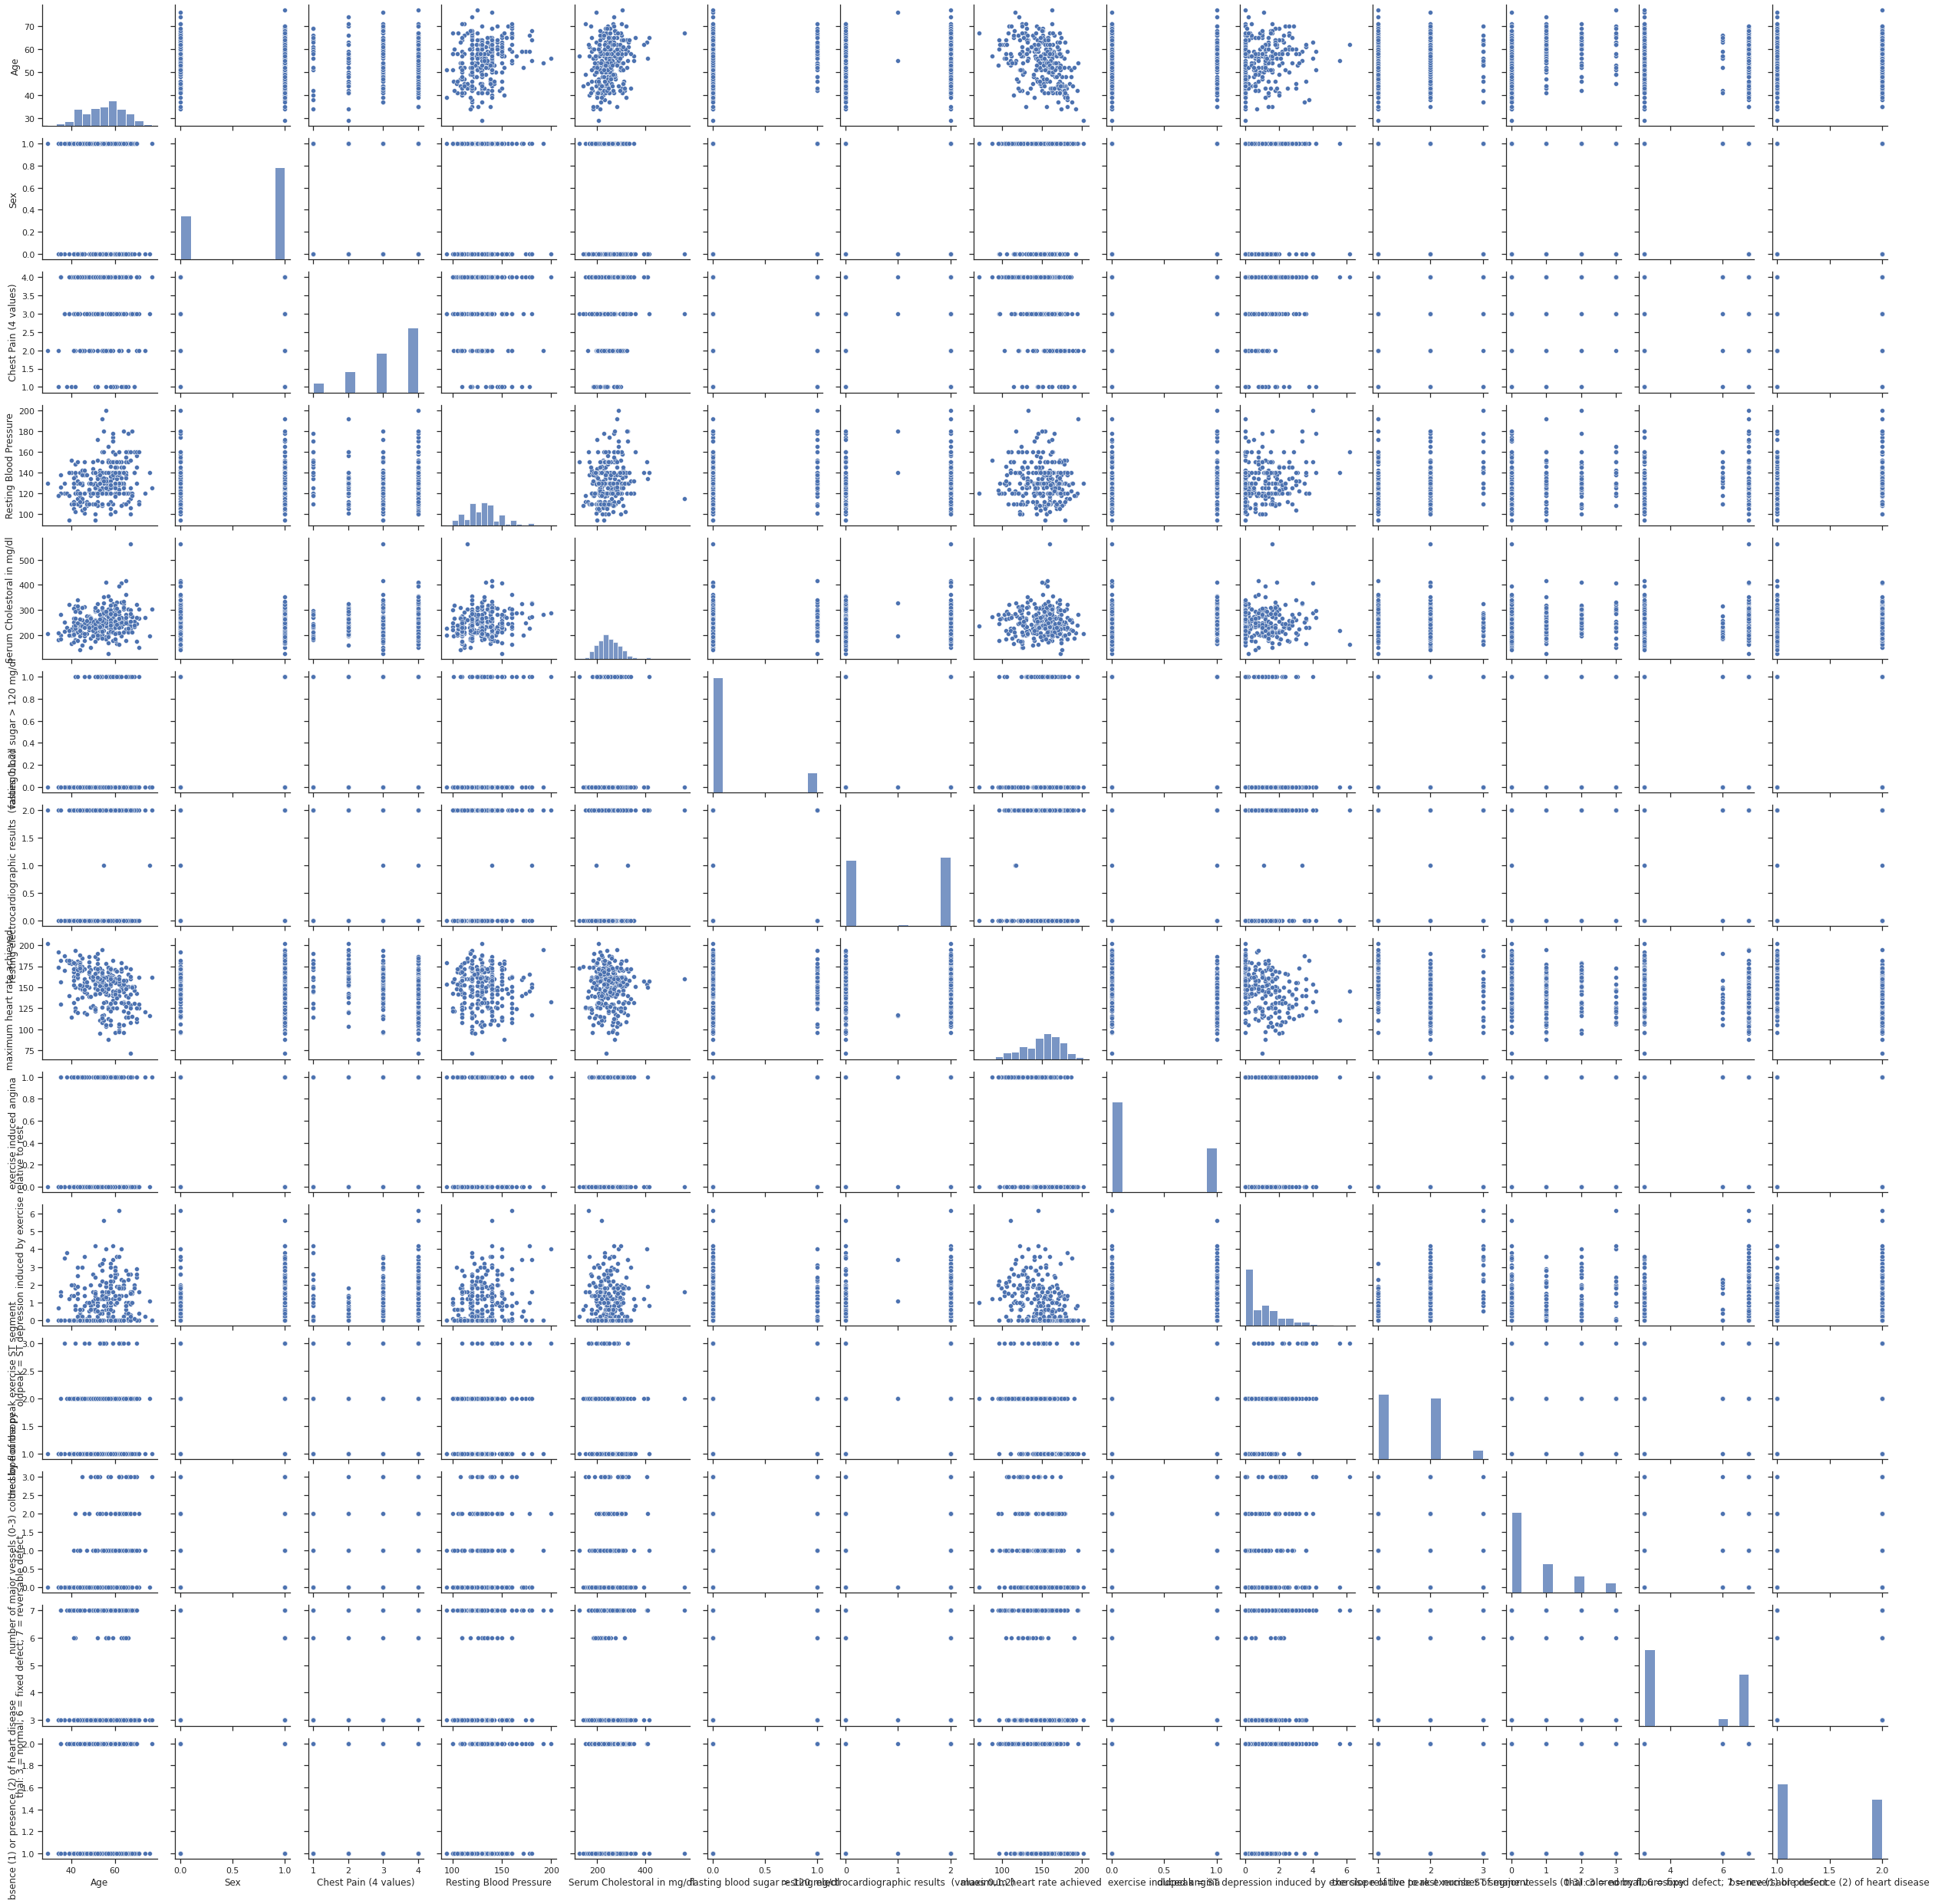

,Age,Sex,Chest Pain (4 values),Resting Blood Pressure,Serum Cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,"resting electrocardiographic results (values 0,1,2)",maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,bsence (1) or presence (2) of heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [141]:
import seaborn as sns

sns.set(style= "ticks", color_codes= True)
g = sns.pairplot(df)
import matplotlib.pyplot as plt
plt.show()

#describe dataframe
df.describe()

**Q4** 

1. From the above pairplot what kind of relationship we can derive between age and heartrate?

**A4** Write your answer here......The data scattered all over the plot. Since it is not linear we can not find a relation between them. It can be seen that ppl with different ages have same heart rate, so it is hart to find a relation between the two.

**Q5** If you go through metadata (heart.doc) (Attribute Information:) you will see that all data in our dataframe are not of same types.
* So we should deal them accordingly.  
* We don't have to do anything to 'real' data. However we have to deal with ordered data and nominal data  
* We only need to convert all nominal and ordered data to dummy variables 

**A5** Replace ??? with code in the code cell below


In [142]:

dummy_list = (['Chest Pain (4 values)', 'resting electrocardiographic results (values 0,1,2)'
              , 'the slope of the peak exercise ST segment', 
               'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect'])
#df = pd.get_dummies(??, columns=??, prefix= ?, prefix_sep='-')
df = pd.get_dummies(dummy_list, columns = None, prefix= "dmy", prefix_sep='-')
df.head()

,dmy-Chest Pain (4 values),"dmy-resting electrocardiographic results (values 0,1,2)",dmy-thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,dmy-the slope of the peak exercise ST segment
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0


In [143]:
## KNN Model from sklearn

**Q6** Get training data from the dataframe
1. Assign values of ```presence``` column to y, note you have to use .values method
2. Drop 'presence' column from data frame,
3. Assign df values to x

Split dataset into train and test data use train_test_split
1. Use stratify = y and test_size = 0.25 and random_state = 123
2. Create a KNN model using sklearn library, ```Initialize n_neighbors = 4```, ```(See the documenttaion for details)```
3. Fit the model with the train data 

**A6** Replace ??? with code in the code cell below

In [144]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("heart.dat", names = columns, sep=' ' )
# Assign values of ```presence``` column to y, note you have to use .values method
#y = ??
y = df['Chest Pain (4 values)'].values
# Drop 'presence' column from data frame,
df.drop(columns=['Chest Pain (4 values)'])
# Assign df values to x
x = df.drop(columns=['Chest Pain (4 values)'])
# View shape of x and y
x.shape, y.shape
# Use stratify = y and test_size = 0.25 and random_state = 123

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=123, stratify=y)

# Create a KNN model using sklearn library, k=4 
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the model with the train data
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

**Q7** 
_Analysis_
* Predict xtest and view first 20 predicitons
* Compare prediction with real ytest 20 predictions
* Print the score with test data

The way we fit the dataset is not good  
_Normalization_
* rescale only real value columns
* For each column normalize ```df[col] as (x - mean) / standard_deviation```

**A7** Replace ??? with code in the code cell below

In [145]:
#  Predict xtest and view first 20 predicitons
print(knn.predict(xtest)[0:20])

# Compare prediction with real ytest 20 predictions
print(ytest[0:20])

# Print the score with test data
print(knn.score(xtest, ytest))

#rescale only real value columns
realcols = (["Age","Resting Blood Pressure", "Serum Cholestoral in mg/dl",
            "maximum heart rate achieved",
           "oldpeak = ST depression induced by exercise relative to rest",
           "number of major vessels (0-3) colored by flourosopy"])

# For each column normalize ```df[col] as (x - mean) / standard_deviation```
for col in df.columns:
  mean = df[col].mean()
  #print(mean)
  std = df[col].std()
  #print(std)
  df[col] = (df[col]- mean) / std


[3. 3. 4. 1. 2. 4. 4. 2. 4. 3. 3. 4. 2. 3. 4. 4. 2. 2. 1. 4.]
[3. 4. 4. 4. 4. 3. 4. 2. 3. 4. 4. 4. 4. 3. 2. 3. 3. 3. 1. 3.]
0.3382352941176471


**Q8** Write the code to train new model using KNN classifier, k=4 (same as above)

**A8** Replace ??? with code in the code cell below

In [146]:
# update x
##x=?
x = df.values
# Train test Split
##xtrain, xtest, ytrain, ytest =
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=123, stratify=y)

# Model Initialization
##knn = ?
knn = KNeighborsClassifier(n_neighbors=4)

# Model fitting with training data
##knn.fit(?, ?)
knn.fit(xtrain,ytrain)

# Now print score on test data
##knn.score(?, ?)
print(knn.score(xtest, ytest))

0.6617647058823529


**Q9** Lets analyze the difference between two modeling strategies (data normalization)  Compare score with and without data normalization process and explain

**A9**  
Without normalization, database systems can be inaccurate, slow, and inefficient and they might not produce the data we expect. By normalizing, we store data where it logically and uniquely belongs. It can be seen that we scored better after normalizing data.

**Q10** Now we will write a function that will initialize, fit and return score on test data for given values of k and Plot result  

1. Use values from 1 to 20(inclusive) and get score and plot as a line graph
* Hint : For advance method you can use map (recall functional programming from last exercise) or you can use simple loops

2. Finally you can print the best value of k by getting the index   
* N.B: Note index starts with 0 but values of k starts with 1 so actual value of k will be 1 more  
* You can use ```np.argmax()``` function  

3. Now define your best model as bestknn and print score

**A10** Write the code below (replace??)

[0.6764705882352942, 0.6176470588235294, 0.7205882352941176, 0.6617647058823529, 0.6470588235294118, 0.7058823529411765, 0.6764705882352942, 0.6176470588235294, 0.6764705882352942, 0.6764705882352942, 0.6911764705882353, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6323529411764706, 0.6323529411764706, 0.6617647058823529, 0.6470588235294118, 0.6323529411764706]
BESt VALUE OF K 3
[[ 3  2  0  0]
 [ 1  5  5  0]
 [ 0  5 12  3]
 [ 0  1  2 29]]


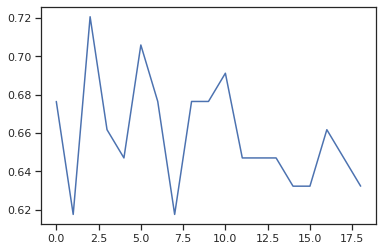

In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  #knn.fit(??, ??)
  knn.fit(xtrain, ytrain)
  return knn.score(xtest, ytest)

#result = [*map(lambda i:returnScore(i,??, ??, ??, ??), range(?,?))]
result = [*map(lambda i:returnScore(i,xtrain, xtest, ytrain, ytest), range(1,20))]
print(result)
plt.plot(result)

print('BESt VALUE OF K',np.argmax(result) + 1 )

#bestknn = KNeighborsClassifier(n_neighbors=?)
bestknn = KNeighborsClassifier(n_neighbors= np.argmax(result) + 1)

#bestknn.fit(??)
bestknn.fit(xtrain, ytrain)
#bestknn.score(??)
bestknn.score(xtest, ytest)
#ypred = bestknn.?
ypred = bestknn.predict(xtest)
#matrix = confusion_matrix(?)
matrix = confusion_matrix(ytest, ypred)
print(matrix)

**Q11** Now plot confusion matrix using [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), for xtest data. Use the Best KNN model from the above question as the estimator. See [Visualization with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html) example. 

**A11** Replace ??? with code in the code cell below

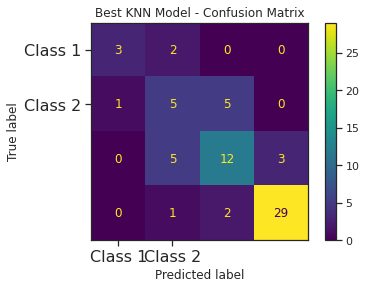

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#cm = ConfusionMatrixDisplay.?
cm = ConfusionMatrixDisplay.from_predictions(ytest, ypred)

plt.title("Best KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

**Q12:** 
1. Calculate the test MSE 
2. Get the score from the model using test data
3. Plot Precision-Recall Curve from the true & predicted test data

**A12** Replace ??? with code in the code cell below

In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt


#mse = mean_squared_error(?) 
mse = mean_squared_error(ytest, ypred)          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

#print(bestknn.score(?))
print(bestknn.score(xtest, ytest))


#PrecisionRecallDisplay.from_estimator(?)
PrecisionRecallDisplay.from_estimator(bestknn, xtest, ytest)
plt.show()

Test mean squared error (MSE): 0.32
0.7205882352941176


ValueError: Expected 'estimator' to be a binary classifier, but got KNeighborsClassifier fit on multiclass (4 classes) data

## Further reading

* [KNN model creation](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)
* [Example of KNN](https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch4_classification_applied.ipynb)